In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Random Forest

### Steps


*   Encode categorical columns using label encoding for ones that have a natural order like employment type and education and `pd.get_dummies`(one-hot encoding) for ones that does not have a natural order.
*   Split the data into training and validation sets; use stratify to maintain class distribution.
*   Create an instance of RandomForestClassifier.
*   Define a Parameter grid with all necessary paramters
*   Before training, drop irrelevant columns such as LoanID.
*   Although Random Forests are less affected by scaling, so we can skip any scaling steps.
*   Conduct a randomized search over the parameter grid to find the optimal hyperparameters. Train the model by fitting it on the training data.
* Key parameters include `n_estimators` and `max_features`, which affect the model's accuracy and computational efficiency.
* Use the model with the best parameters to make predictions on the test data.




In [3]:
# Get the training data into the dataframe

df=pd.read_csv('train.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0


In [4]:
# Check for null columns
cols = df.columns
df.isna().sum()


,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [5]:
#drop columns like LoanID as they play no significance into predicting the Default

df.drop(columns=['LoanID'], inplace=True)
df.shape
df


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [6]:
#replace yes or no with 1 or 0 in has_mortgage has_dependents, has_co_signer

df['HasMortgage'] = df['HasMortgage'].replace({'Yes':1, 'No':0})
df['HasDependents'] = df['HasDependents'].replace({'Yes':1, 'No':0})
df['HasCoSigner'] = df['HasCoSigner'].replace({'Yes':1, 'No':0})

<ipython-input-6-a1efa9c1c482>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HasMortgage'] = df['HasMortgage'].replace({'Yes':1, 'No':0})
<ipython-input-6-a1efa9c1c482>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HasDependents'] = df['HasDependents'].replace({'Yes':1, 'No':0})
<ipython-input-6-a1efa9c1c482>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future 

In [7]:
#education, employment, property, and loan purpose unique values

df['Education'].unique()



#replace education with 0, 1, 2, 3 using ordinal encoding as natural order may exist
df['Education'] = df['Education'].replace({'High School':0, 'Bachelor\'s':1, 'Master\'s':2, 'PhD':3})



<ipython-input-7-2314a34a6ebb>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace({'High School':0, 'Bachelor\'s':1, 'Master\'s':2, 'PhD':3})


In [8]:
df['EmploymentType'].unique()


#replace employment with 0, 1, 2, 3 using ordinal encoding as natural order may exist
df['EmploymentType'] = df['EmploymentType'].replace({'Unemployed':0, 'Part-time':1, 'Full-time':2, 'Self-employed':3})


<ipython-input-8-7a29c0712dc7>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EmploymentType'] = df['EmploymentType'].replace({'Unemployed':0, 'Part-time':1, 'Full-time':2, 'Self-employed':3})


In [9]:
df['MaritalStatus'].unique()


#replace marital status with 0, 1, 2 using ordinal encoding as natural order may exist
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single':0, 'Married':1, 'Divorced':2})


<ipython-input-9-25a0d4d2d30f>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MaritalStatus'] = df['MaritalStatus'].replace({'Single':0, 'Married':1, 'Divorced':2})


In [10]:
df['LoanPurpose'].unique()

# one hot encoding it, since there seems to be no natural order
df = pd.get_dummies(df, columns=['LoanPurpose'])

#turn all false to 0 and true to 1

columns_to_convert = [
    'LoanPurpose_Auto',
    'LoanPurpose_Business',
    'LoanPurpose_Education',
    'LoanPurpose_Home',
    'LoanPurpose_Other'
]

# Convert True/False to 1/0 in the specified columns
df[columns_to_convert] = df[columns_to_convert].astype(int)


In [11]:
df



,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,Default,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,18,137576,209136,846,26,2,10.47,60,0.81,0,...,0,1,0,0,0,0,1,0,0,0
1,47,57194,5970,748,30,2,19.72,36,0.73,0,...,2,0,1,0,0,0,0,1,0,0
2,26,84328,95065,453,7,2,24.25,12,0.45,2,...,1,0,0,1,0,0,0,0,0,1
3,53,49795,229582,533,107,3,14.44,60,0.17,1,...,0,1,0,1,1,1,0,0,0,0
4,49,115450,22072,840,0,4,24.48,12,0.11,1,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,40,116623,161673,651,79,2,23.44,12,0.87,1,...,2,0,0,1,0,0,0,0,1,0
204273,67,62958,189499,460,77,3,9.29,36,0.11,1,...,0,0,0,1,0,0,1,0,0,0
204274,62,34372,59645,524,94,3,9.72,60,0.24,3,...,0,1,0,0,0,1,0,0,0,0
204275,44,146262,198454,489,7,4,4.31,48,0.30,0,...,1,1,0,0,0,0,0,0,1,0


### Box Plot for better understanding of data and outliers

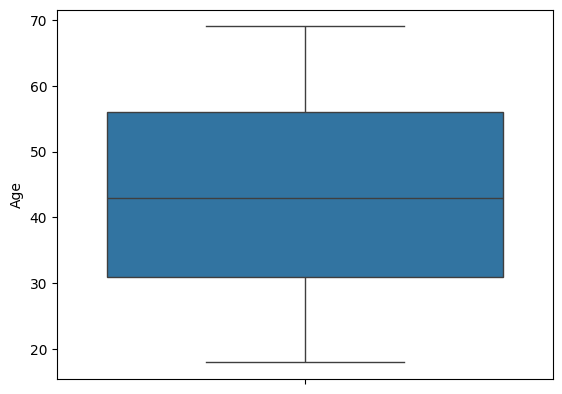

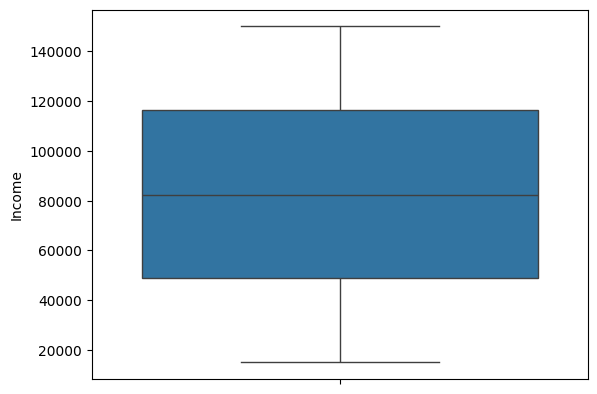

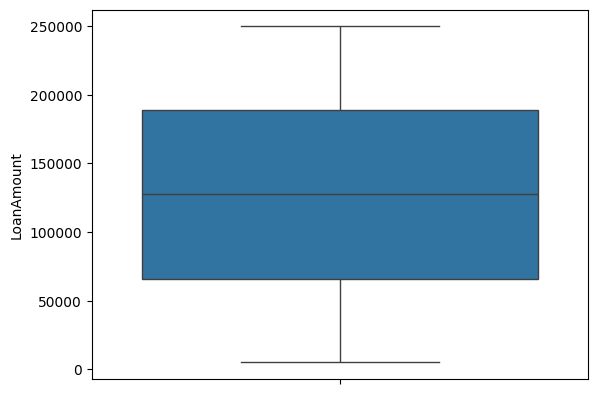

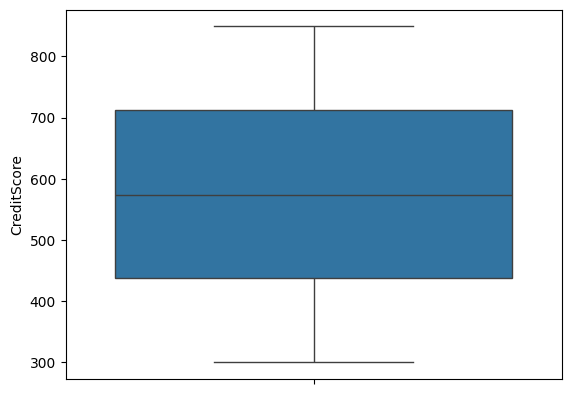

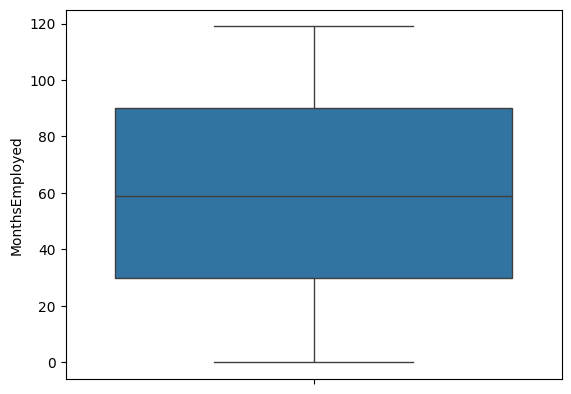

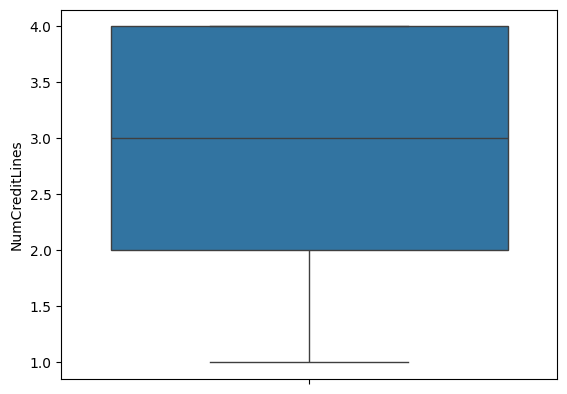

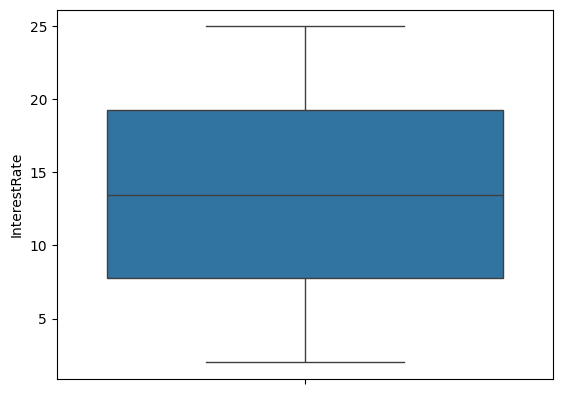

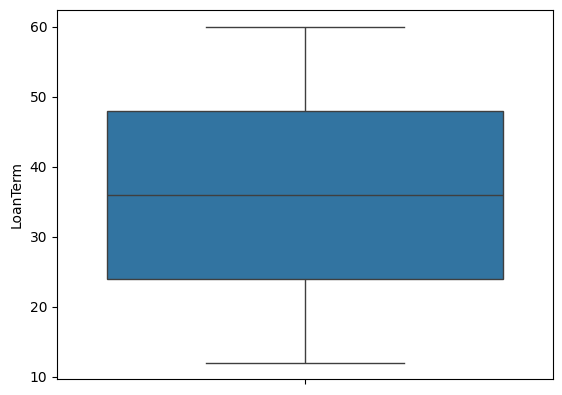

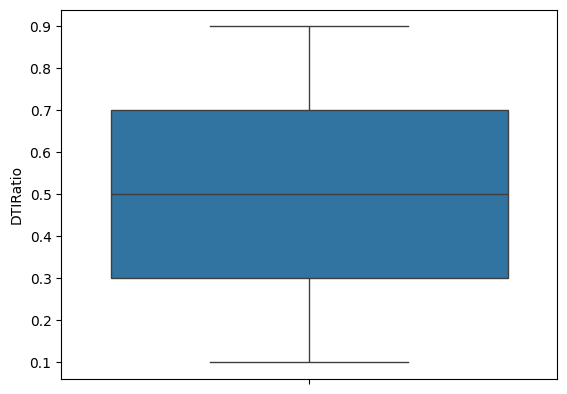

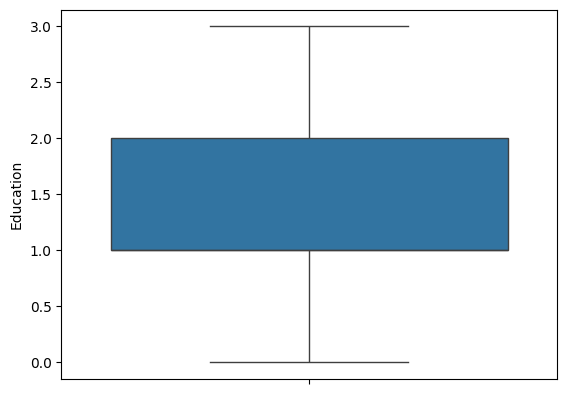

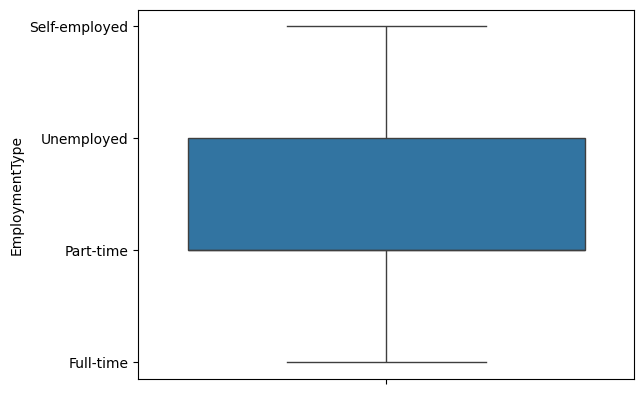

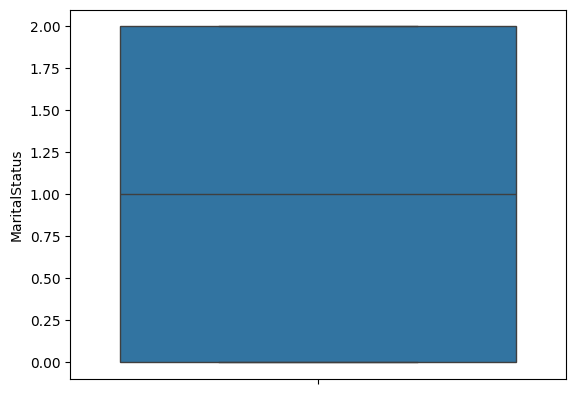

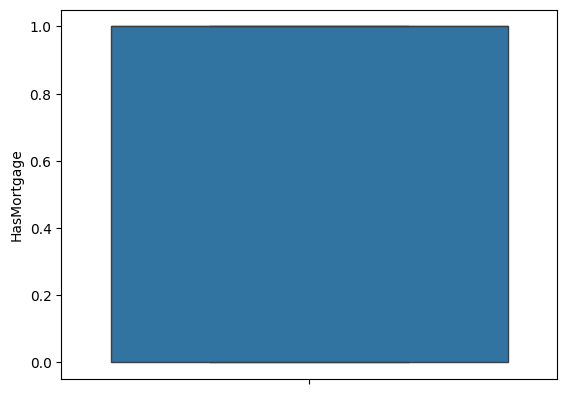

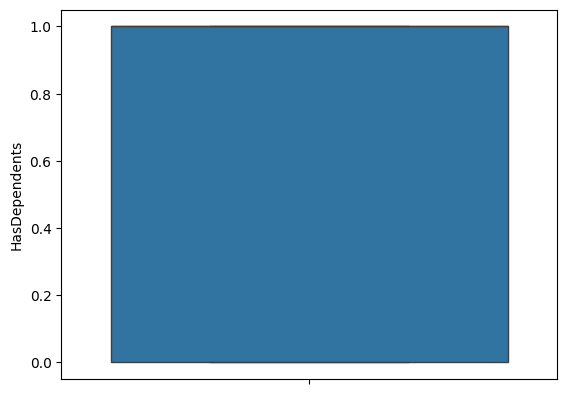

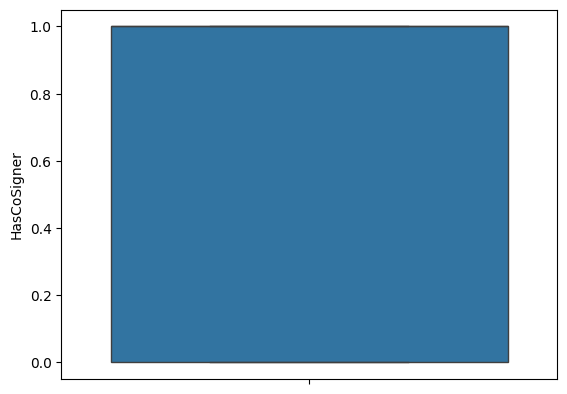

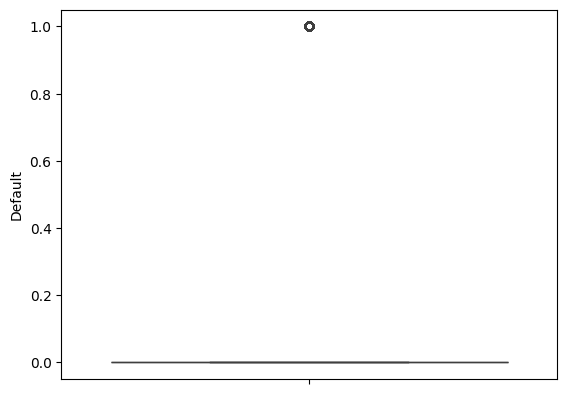

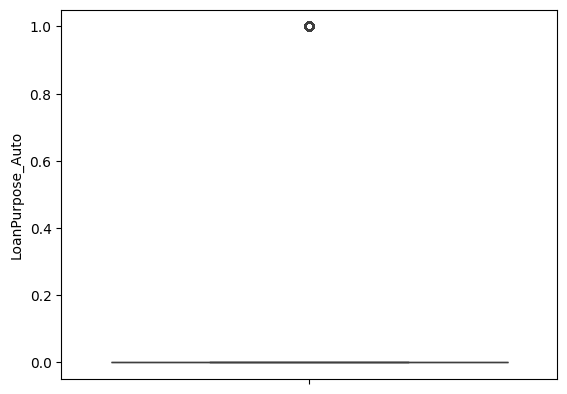

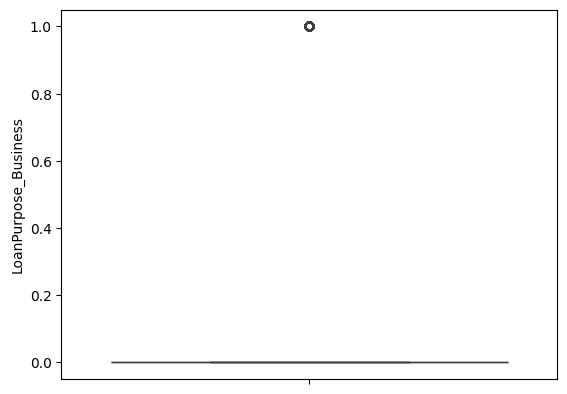

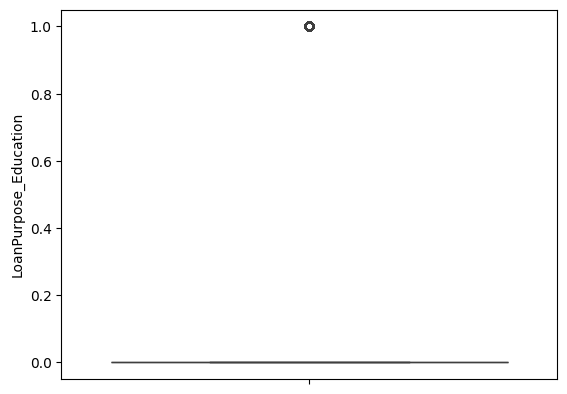

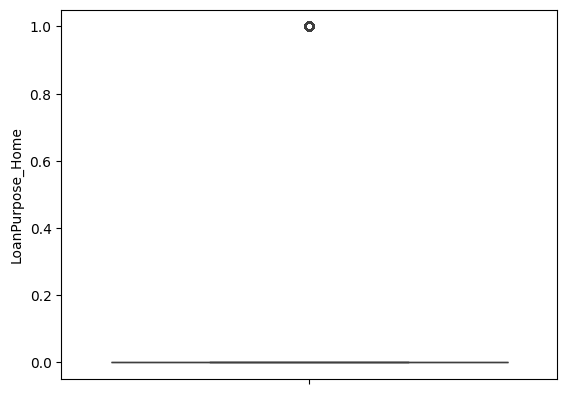

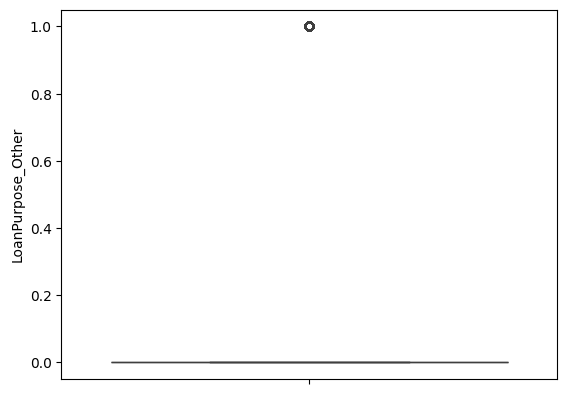

In [11]:
#make box plot for each column
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [12]:
#Split it into train and test data, 80:20
X = df.drop(columns=['Default'])
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=114)


In [31]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

#Applying Random Forest on Decision trees
#Search for the best parameters for the gradient boost using randomized search

n_estimators = [200, 300, 400]
max_features = ['auto', 'sqrt']
max_depth = [13, 17, 19]
min_samples_split = [5, 7, 9]
min_samples_leaf = [2, 3]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=10,
    cv=5,
    verbose=1,
    random_state=114,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("Best parameters found: ", rf_random.best_params_)

# Use the best paramaters onto the RandomForestClassifiers
rf = RandomForestClassifier(
    n_estimators=rf_random.best_params_['n_estimators'],
    min_samples_split=rf_random.best_params_['min_samples_split'],
    min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
    max_features=rf_random.best_params_['max_features'],
    max_depth=rf_random.best_params_['max_depth'],
    bootstrap=rf_random.best_params_['bootstrap']
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", li

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 19, 'bootstrap': False}
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     36147
           1       0.60      0.04      0.07      4709

    accuracy                           0.89     40856
   macro avg       0.75      0.52      0.51     40856
weighted avg       0.86      0.89      0.84     40856



In [32]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier


# Load the test data
df_test1 = pd.read_csv('test.csv')
df_test = df_test1.drop(columns=['LoanID'])


# Apply the same preprocessing steps to the test data
df_test['HasMortgage'] = df_test['HasMortgage'].replace({'Yes': 1, 'No': 0})
df_test['HasDependents'] = df_test['HasDependents'].replace({'Yes': 1, 'No': 0})
df_test['HasCoSigner'] = df_test['HasCoSigner'].replace({'Yes': 1, 'No': 0})
df_test['Education'] = df_test['Education'].replace({'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3})
df_test['EmploymentType'] = df_test['EmploymentType'].replace({'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3})
df_test['MaritalStatus'] = df_test['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2})
df_test = pd.get_dummies(df_test, columns=['LoanPurpose'])


# Make predictions on the test data
y_pred = rf.predict(df_test)


# Save LoanID and prediction
output = pd.DataFrame({'LoanID': df_test1['LoanID'], 'Default': y_pred})
output.to_csv('output_rf.csv', index=False)
print("done")

<ipython-input-32-db8cfee3126e>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['HasMortgage'] = df_test['HasMortgage'].replace({'Yes': 1, 'No': 0})
<ipython-input-32-db8cfee3126e>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['HasDependents'] = df_test['HasDependents'].replace({'Yes': 1, 'No': 0})
<ipython-input-32-db8cfee3126e>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

done


## Using Out of Bag on the best parameters model

#### results: slighly less favorable than one using cross validation error

In [16]:
from sklearn.ensemble import RandomForestClassifier
# Use OOB on the best paramters obtained

best_params = {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 19, 'bootstrap': False}

rf_oob = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    bootstrap=True,
    oob_score=True
)

rf_oob.fit(X_train, y_train)
print("OOB score:", rf_oob.oob_score_)

y_pred = rf_oob.predict(X_test)

print(classification_report(y_test, y_pred))

OOB score: 0.8852534252023914
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     36147
           1       0.65      0.03      0.07      4709

    accuracy                           0.89     40856
   macro avg       0.77      0.52      0.50     40856
weighted avg       0.86      0.89      0.84     40856



In [15]:
# prompt: get the data from test.csv and predict the output and put it into the output.csv file

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier


# Load the test data
df_test1 = pd.read_csv('test.csv')
df_test = df_test1.drop(columns=['LoanID'])


# Apply the same preprocessing steps to the test data
df_test['HasMortgage'] = df_test['HasMortgage'].replace({'Yes': 1, 'No': 0})
df_test['HasDependents'] = df_test['HasDependents'].replace({'Yes': 1, 'No': 0})
df_test['HasCoSigner'] = df_test['HasCoSigner'].replace({'Yes': 1, 'No': 0})
df_test['Education'] = df_test['Education'].replace({'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3})
df_test['EmploymentType'] = df_test['EmploymentType'].replace({'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3})
df_test['MaritalStatus'] = df_test['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2})
df_test = pd.get_dummies(df_test, columns=['LoanPurpose'])

# Standardize the test data using the same scaler fitted on the training data


# Make predictions on the test data
y_pred = rf_oob.predict(df_test)


# Save LoanID and prediction
output = pd.DataFrame({'LoanID': df_test1['LoanID'], 'Default': y_pred})
output.to_csv('output_rf_oob.csv', index=False)
print("done")

<ipython-input-15-c08663bed4da>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['HasMortgage'] = df_test['HasMortgage'].replace({'Yes': 1, 'No': 0})
<ipython-input-15-c08663bed4da>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['HasDependents'] = df_test['HasDependents'].replace({'Yes': 1, 'No': 0})
<ipython-input-15-c08663bed4da>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

done
